In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('seaborn')

In [2]:
temperatures = (0.00000, 0.39919, 0.79968, 1.19905, 1.60290, 1.99690)

In [3]:
rdf_data = pd.DataFrame(columns=['radius'])

for temperature in temperatures:
    df = pd.read_csv(
        f'rdf_file_T_{temperature:.5f}.csv',
        sep=';',
    )
    rdf_data = rdf_data.merge(
        right=df,
        how='outer',
        on='radius',
    )
    rdf_data = rdf_data.rename(columns={'rdf': f'{temperature:.5f}'})
    
rdf_data

,radius,0.00000,0.39919,0.79968,1.19905,1.60290,1.99690
0,0.005,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08
1,0.015,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.025,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.035,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.045,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
608,6.085,2.359544e-01,9.579974e-01,1.003876e+00,9.960505e-01,9.765079e-01,9.278684e-01
609,6.095,1.252146e-01,9.528662e-01,1.003426e+00,9.955557e-01,9.753094e-01,9.275557e-01
610,6.105,7.979613e-02,9.494598e-01,1.003162e+00,9.948157e-01,9.759993e-01,9.272005e-01
611,6.115,7.329729e-02,9.449633e-01,1.002228e+00,9.947344e-01,9.763199e-01,9.268647e-01


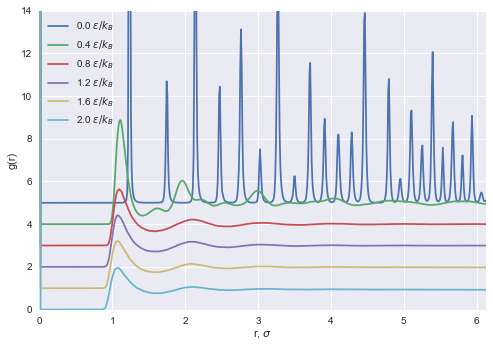

In [4]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        rdf_data['radius'], 
        rdf_data[f'{temperature:.5f}'] + len(temperatures) - i - 1, 
        label=f'{temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel('r, $\sigma$');
plt.ylabel('g(r)');
plt.xlim(left=0, right=6.125);
plt.ylim(bottom=0, top=14);
plt.legend();